<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/Binary_Classification_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary Classification**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv', delimiter = ',')       # reading train set
df = df.drop(columns = ['ID'])
print(df.shape)

(48000, 21)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df.iloc[43200:])

TRAIN SET
       Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
0     -36.963099  -15.014703   87.100435  101.523360   82.106571  -10.956180   
1     -43.715674   18.847116   89.543406  -71.319314   35.597052  126.358570   
2     -30.737550  -63.729643  106.081332   81.773948  112.769976  -12.425351   
3     -27.674757 -118.869495  135.605213   99.130189   50.947548  -63.704785   
4     -28.654141  -77.746597   85.215365   50.374774   79.763207  -32.703048   
...          ...         ...         ...         ...         ...         ...   
38395 -29.171370 -152.034273  156.965320 -239.062422  134.848173    3.380466   
38396 -35.695385  -44.936642  111.833090   51.983170  127.678914  196.218580   
38397 -28.277331 -125.625392  120.194535  -37.492206   99.171636  265.658557   
38398 -23.578333  -91.315717  125.826775   12.103965  141.809009   20.689070   
38399 -25.094541 -102.212333   77.910757 -184.223625   76.150694   10.650616   

       Feature_7  Feature_8  

`Feature Engineering`

In [ ]:
df['Feature_21'] = df['Feature_6'] ** 2                                     #squares
df['Feature_22'] = df['Feature_9'] ** 2
df['Feature_23'] = df['Feature_14'] ** 2
df['Feature_24'] = df['Feature_15'] ** 2
df['Feature_25'] = df['Feature_17'] ** 2


df['Feature_26'] = df['Feature_6'] * df['Feature_15']                        #interacting_features
df['Feature_27'] = df['Feature_6'] * df['Feature_17']
df['Feature_28'] = df['Feature_6'] * df['Feature_4']
df['Feature_29'] = df['Feature_6'] * df['Feature_16']
df['Feature_30'] = df['Feature_15'] * df['Feature_17']
df['Feature_31'] = df['Feature_4'] * df['Feature_16']

df['Feature_32'] = df['Feature_4'] ** 3                                     #cubes
df['Feature_33'] = df['Feature_6'] ** 3
df['Feature_34'] = df['Feature_15'] ** 3
df['Feature_35'] = df['Feature_16'] ** 3
df['Feature_36'] = df['Feature_17'] ** 3
df['Feature_37'] = df['Feature_18'] ** 3

df['Feature_38'] = df['Feature_6'] ** 4                                     #fourthpower
df['Feature_39'] = df['Feature_15'] ** 4
df['Feature_40'] = df['Feature_17'] ** 4

df['Feature_41'] = df['Feature_6'] ** 5                                     #fifth power
df['Feature_42'] = df['Feature_15'] ** 5
df['Feature_43'] = df['Feature_17'] ** 5
df['Feature_44'] = df['Feature_18'] ** 5

df = df[[col for col in df.columns if col != 'Class'] + ['Class']]          #reordering the columns

print(df)

       Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
0     -36.963099  -15.014703   87.100435  101.523360   82.106571  -10.956180   
1     -43.715674   18.847116   89.543406  -71.319314   35.597052  126.358570   
2     -30.737550  -63.729643  106.081332   81.773948  112.769976  -12.425351   
3     -27.674757 -118.869495  135.605213   99.130189   50.947548  -63.704785   
4     -28.654141  -77.746597   85.215365   50.374774   79.763207  -32.703048   
...          ...         ...         ...         ...         ...         ...   
47995 -36.628645 -165.120975  107.217867  122.925449   62.981807   19.830836   
47996 -39.109204   -9.889646   -6.131819  -52.788080   80.955847   -1.706958   
47997 -35.345541  -80.690360   94.402843    9.939977   70.557427  -24.686198   
47998 -39.594067  -63.804277   52.270657 -140.771476   91.726459   48.515770   
47999 -32.702465 -111.478496  109.341399  -78.184419   99.621404  191.655350   

       Feature_7  Feature_8   Feature_9

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_44']

x_train = features_train.to_numpy()
y_train = df_train['Class'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[-3.69630993e+01 -1.50147029e+01  8.71004347e+01 ... -1.10399337e+08
  -5.13461513e+05  1.58229130e+11]
 [-4.37156740e+01  1.88471157e+01  8.95434064e+01 ...  4.49624880e+08
   9.36976833e+04  2.09357791e+05]
 [-3.07375502e+01 -6.37296427e+01  1.06081332e+02 ... -5.18314446e+10
  -3.42345700e+05  1.21678599e+11]
 ...
 [-2.82773313e+01 -1.25625392e+02  1.20194535e+02 ...  1.02880211e+12
   1.38334345e+07  5.97982811e+11]
 [-2.35783326e+01 -9.13157165e+01  1.25826775e+02 ... -6.52195950e+08
  -4.09798802e+05  3.63895086e+10]
 [-2.50945415e+01 -1.02212333e+02  7.79107575e+01 ...  1.14491341e+12
  -2.24579271e+09  1.40055244e+12]]

y_train = [0 1 0 ... 1 0 0]


`Checking for skewed dataset`

In [ ]:
count_of_ones = np.sum(y_train == 1)

print("Number of 1s:", count_of_ones)

Number of 1s: 12277


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.9088893   1.58090918 -0.11765156 ... -0.24007448  0.38020459
   0.3215604 ]
 [-2.34980147  2.32556147 -0.0548971  ... -0.24000126  0.38029087
  -0.49830947]
 [ 0.41956243  0.5096232   0.36992509 ... -0.24683622  0.3802289
   0.13217227]
 ...
 [ 0.94454135 -0.85152083  0.7324616  ... -0.10555967  0.3822433
   2.60016277]
 [ 1.94724694 -0.09701974  0.87714121 ... -0.24014531  0.38021932
  -0.30975677]
 [ 1.62370757 -0.33664628 -0.35371374 ... -0.09037986  0.06114706
   6.75871137]]


## **3. Visualising the Data**

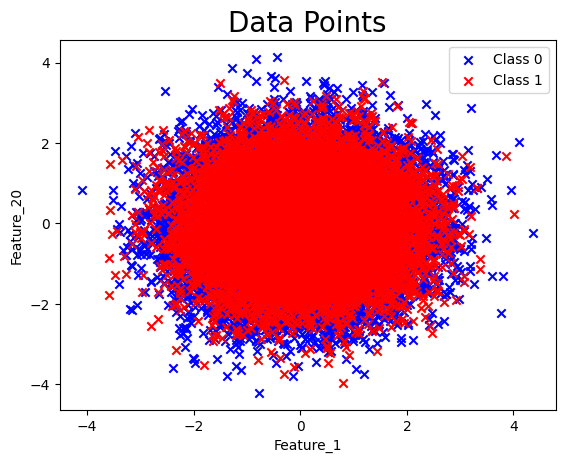

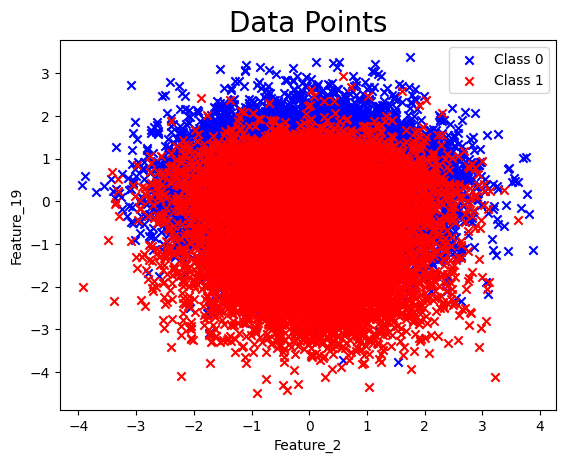

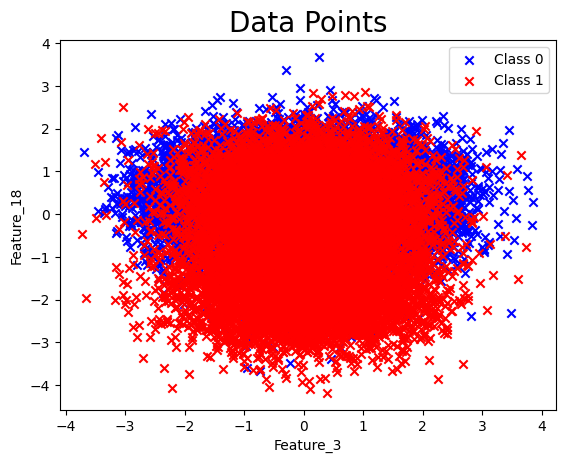

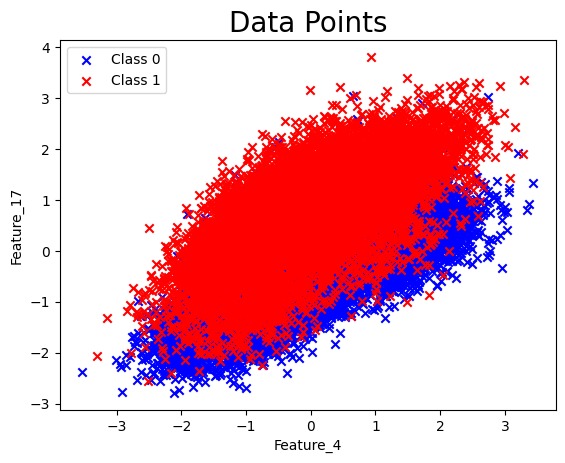

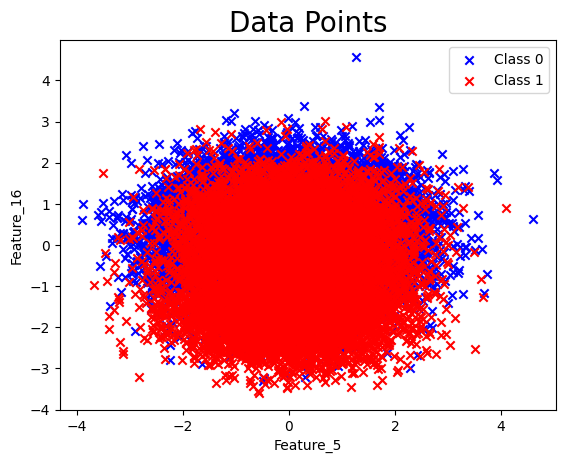

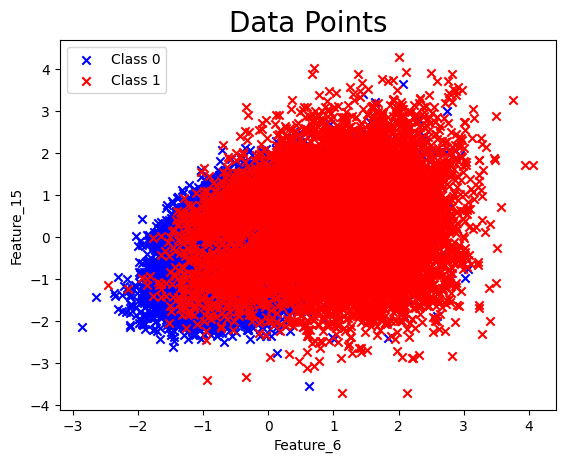

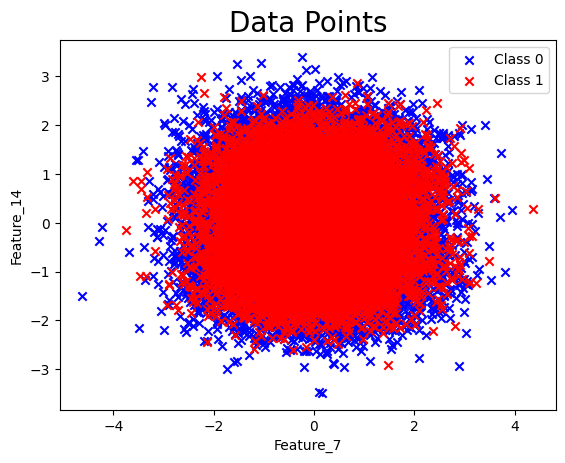

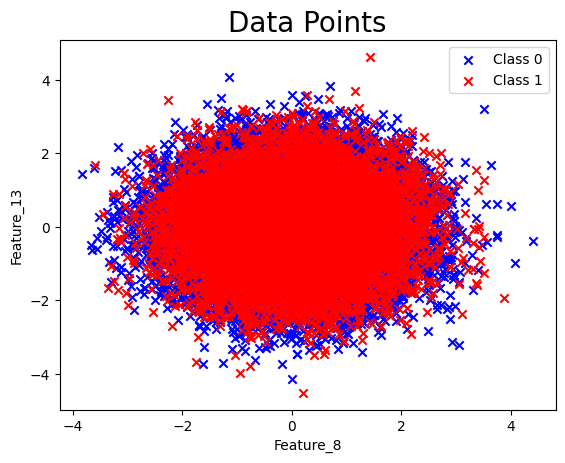

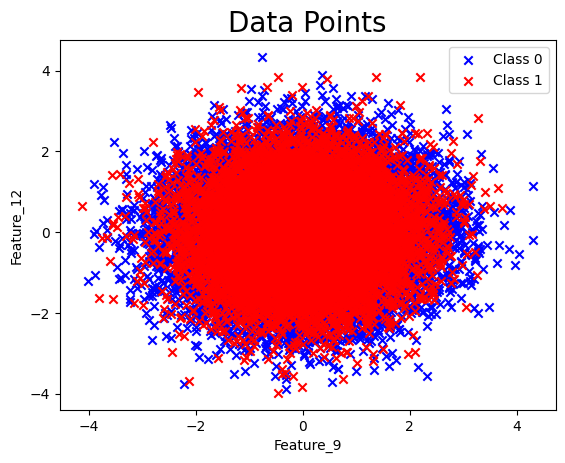

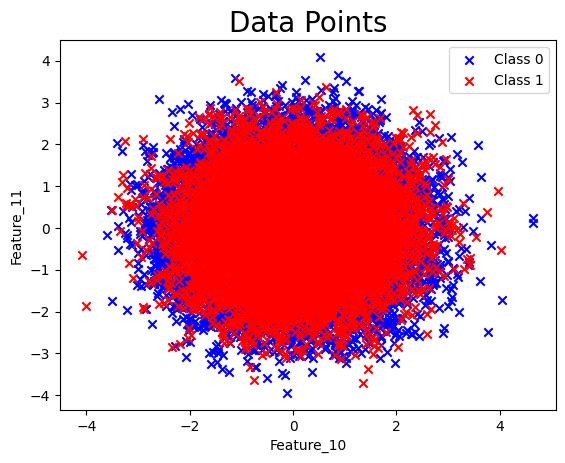

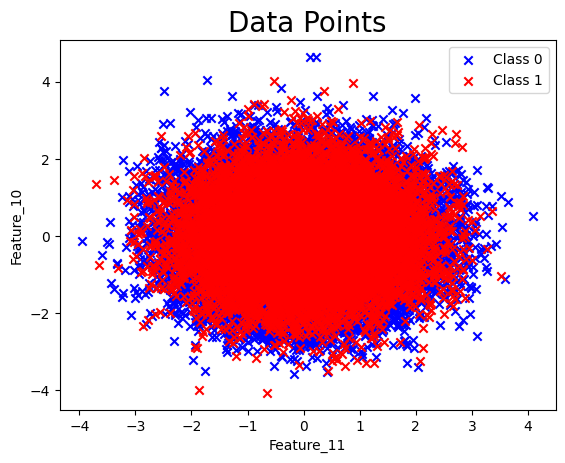

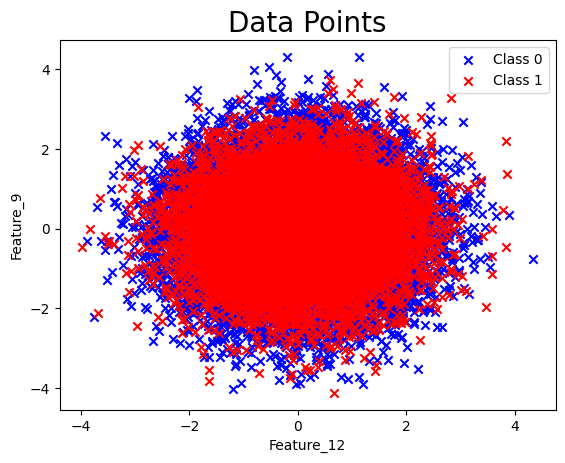

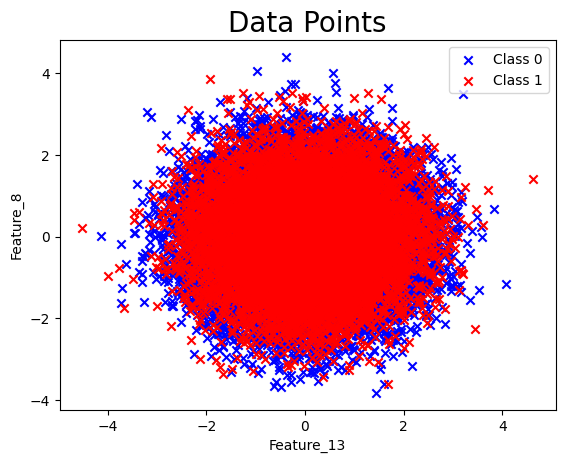

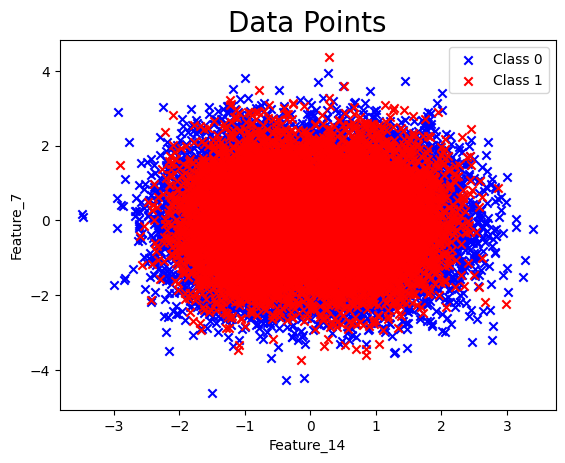

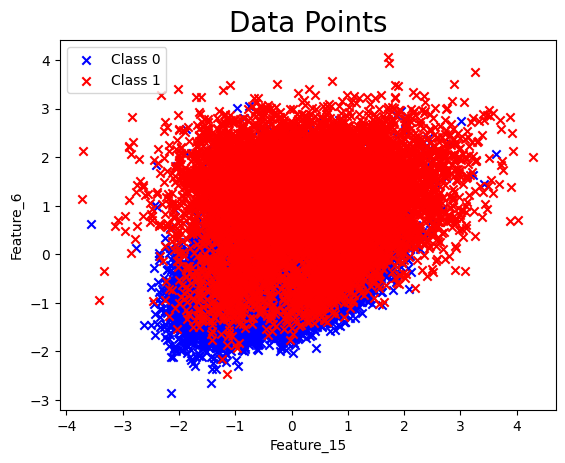

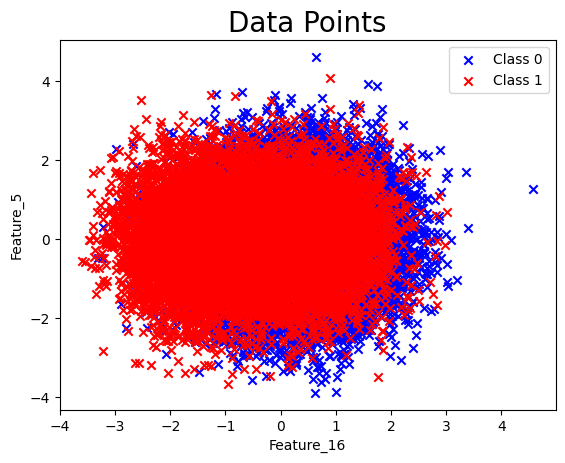

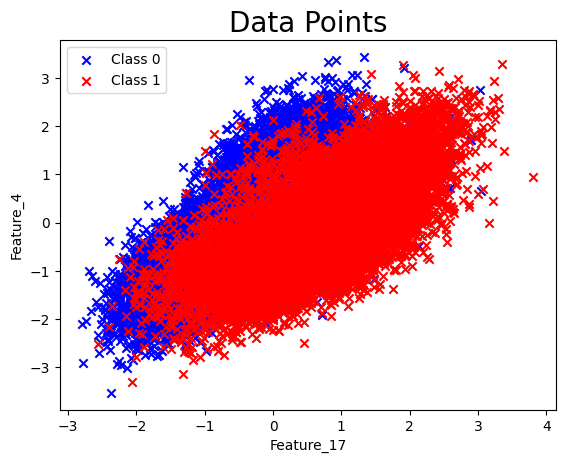

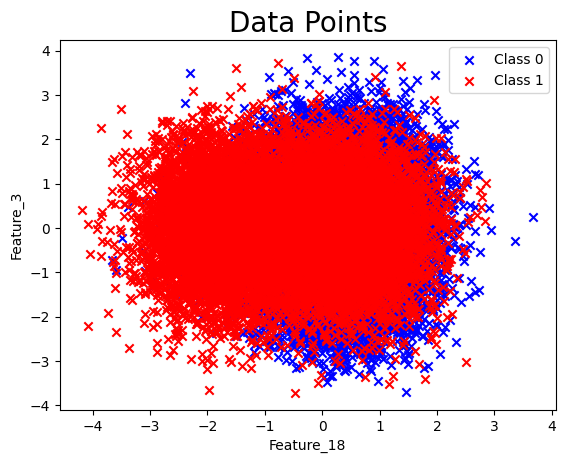

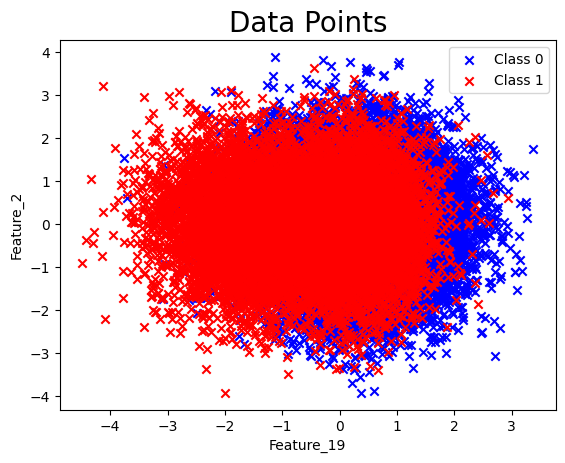

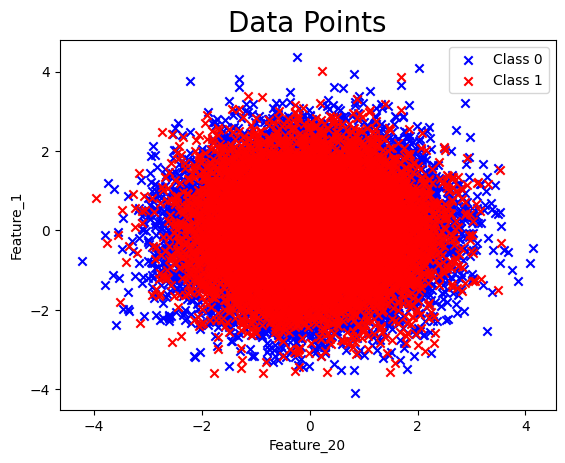

In [ ]:
for i in range(20):
    plt.scatter(x_train[y_train == 0, i], x_train[y_train == 0, 19 - i], marker='x', c='b', label='Class 0')

    plt.scatter(x_train[y_train == 1, i], x_train[y_train == 1, 19 - i], marker='x', c='r', label='Class 1')

    plt.title('Data Points', fontdict={'fontsize': 20})
    plt.ylabel('Feature_' + str(20 - i))
    plt.xlabel('Feature_' + str(i + 1))                     # +1 because index starts from 0

    plt.legend()
    plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Sigmoid Function**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## **Defining Cost Function**

In [ ]:
def cost_function(x, y, a, b):

  z = np.dot(x, a) + b
  f_ab = sigmoid(z)
  J_ab = -np.sum((y * np.log(f_ab)) + (1 - y) * np.log(1 - f_ab)) / m

  return J_ab                                                        # cost function

## **5. Defining Gradient Descent**

`Defining Gradient`

In [ ]:
def gradient(x_train, y_train, a, b):

  z = np.dot(x_train, a) + b
  f_ab = sigmoid(z)
  dJ_da = (1 / m) * np.dot(x_train.T, (f_ab - y_train))
  dJ_db = (1 / m) * np.sum((f_ab - y_train))

  return dJ_da, dJ_db                                     # gradients

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, a, b, alpha, num_iters, cost_function, gradient):

  J_history = []

  for i in range(num_iters):
    dJ_da, dJ_db = gradient(x_train, y_train, a, b)

    a_temp = a - (alpha) * dJ_da
    b_temp = b - (alpha) * dJ_db
    a = a_temp
    b = b_temp

    if i < 100000:
      J_history.append( cost_function(x_train, y_train, a, b))        # storing cost with every iteration for
                                                                      # plotting later.

    if i % (num_iters/10) <= 0.01:
      print(f"Iteration {i:6}: Cost {J_history[-1] :8.4f} " ,
            f"dJ_db: {dJ_db: 0.3e}  ",
            f"b:{b: 0.5e}")

  return a, b, J_history

In [ ]:
a_int = np.full(44, -0.1)           # initial value of a
b_int = 0                           # initial value of b

iterations = 6000
tmp_alpha = 1                       # learning rate

%time

a_final, b_final, J_hist = gradient_descent(x_train ,y_train, a_int, b_int, tmp_alpha,
                                                    iterations, cost_function, gradient)

print(f"TRAIN COST estimated is ={J_hist[-1] : 8.4f}")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs
Iteration      0: Cost   0.3210  dJ_db:  1.927e-01   b:-1.92747e-01
Iteration    600: Cost   0.2301  dJ_db:  3.598e-05   b:-1.13949e+00
Iteration   1200: Cost   0.2283  dJ_db:  2.411e-05   b:-1.15696e+00
Iteration   1800: Cost   0.2273  dJ_db:  1.688e-05   b:-1.16922e+00
Iteration   2400: Cost   0.2268  dJ_db:  1.122e-05   b:-1.17752e+00
Iteration   3000: Cost   0.2265  dJ_db:  7.863e-06   b:-1.18316e+00
Iteration   3600: Cost   0.2263  dJ_db:  5.767e-06   b:-1.18720e+00
Iteration   4200: Cost   0.2261  dJ_db:  4.307e-06   b:-1.19020e+00
Iteration   4800: Cost   0.2260  dJ_db:  3.226e-06   b:-1.19244e+00
Iteration   5400: Cost   0.2259  dJ_db:  2.409e-06   b:-1.19412e+00
TRAIN COST estimated is =  0.2258


## **6. Learning Curve**

`Learning Curve`

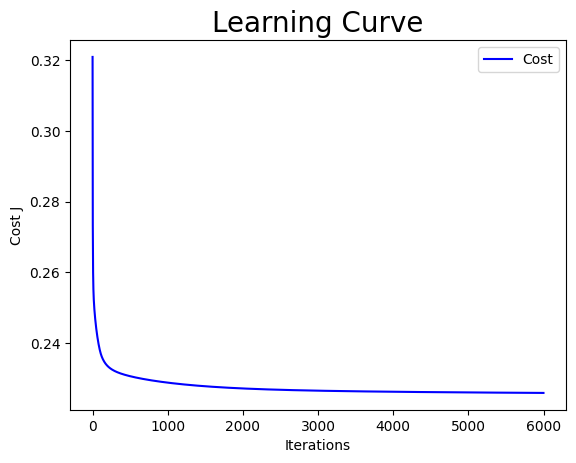

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()




`Learned Parameters`



In [ ]:
print(f'a_final = {a_final}')
print()
print(f"b_final = {b_final}")

a_final = [ 2.37868391e-03 -1.80808393e-02  2.93589942e-02 -1.67898005e-01
 -1.10102152e-03  1.79838161e+00  1.62069737e-02  1.45703762e-02
  2.14796270e-01  3.03722448e-02 -5.22945486e-02 -1.85603137e-05
 -1.55137532e-02 -2.05208003e-01  1.16963407e+00 -1.56773803e-01
  6.30178604e-01 -9.04024257e-01 -1.23937866e-01 -1.03356245e-02
  2.33977544e+00 -3.30774422e-01 -7.65873412e-01  1.85657697e+00
 -2.74600293e-01 -6.64238580e-01  9.46642738e-01 -3.31452901e-01
  7.79924612e-01  1.00952541e+00  1.82357522e-01 -2.93194467e-01
 -2.36055998e+00 -1.41426328e+00 -1.31377744e-01  3.49441409e-01
  6.73183175e-01 -2.03393363e+00  1.56990147e-01  3.58015584e-01
  1.52189703e+00  5.24767619e-01 -6.38717376e-02 -2.64171467e-01]

b_final = -1.1953689124791185


`Visualising Feature Impacts (only required ones)`

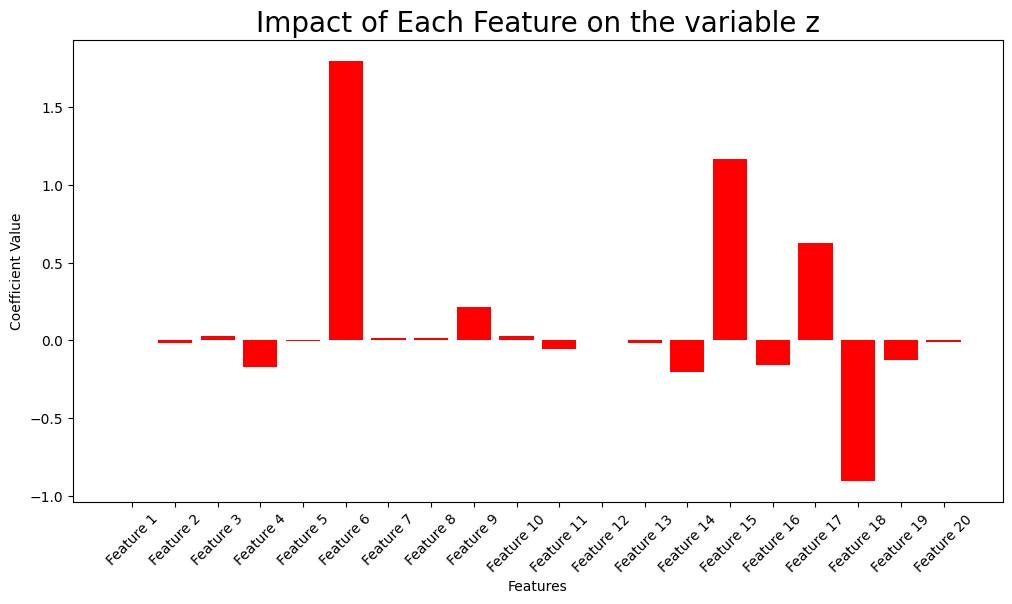

In [ ]:
features = [f'Feature {i + 1}' for i in range(20)]
plt.figure(figsize=(12, 6))

plt.bar(range(20), a_final[:20], color = 'r')

plt.title("Impact of Each Feature on the variable z", fontdict={'fontsize': 20})
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.xticks(range(20), features, rotation=45)

plt.show()

##**7. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_44']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Class'].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[ -1.04290014  -0.40543111   1.06029893 ...  -0.2398059    0.37569405
   -0.49278749]
 [ -1.28764541  -1.55968312   0.85545558 ...  -0.23858031  -0.39871321
    2.16573026]
 [  0.11352059   0.37085937  -0.6519622  ...   0.1946674    0.18271483
   -0.46206348]
 ...
 [  1.37180738  -1.36734902   0.22169072 ...  -0.2248981    0.20512997
   -0.33718415]
 [ -0.52802193   2.17126539  -0.13363288 ...  -0.09211914   0.38368448
   -0.49765132]
 [  0.21638046  -0.46807723  -0.5261406  ...  -0.0295136  -12.52535912
   -0.49857482]]
y_cv = [0 0 0 ... 0 1 0]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4800


`Computing Cross Validation Cost`

In [ ]:
Cross_Validation_Cost = cost_function(x_cv, y_cv, a_final, b_final)

print(f"Cross Validation Cost ={Cross_Validation_Cost:8.4f}")

Cross Validation Cost =  0.0289


##**8. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_44']

x_test = features_test.to_numpy()
y_test = df_test['Class'].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[-3.89851922e-01  5.99637956e-01 -1.26019015e+00 ...  5.68091602e-01
  -1.70513099e+00  4.34673930e-01]
 [-2.55696573e-01 -5.40677153e-01  2.46901735e-01 ...  2.72134747e-01
   3.83014977e-01 -4.98310560e-01]
 [-6.95926840e-01 -1.51835668e+00 -8.43377951e-01 ... -8.62459767e-02
   3.79696759e-01 -1.46004730e-01]
 ...
 [-5.63723254e-01  1.36641539e-01  6.99309204e-02 ... -2.40060044e-01
   3.74176402e-01 -2.57861348e-01]
 [-1.47030384e+00  5.07981912e-01 -1.01235039e+00 ...  4.95410726e-01
  -1.18570825e-01  1.54505988e+00]
 [ 2.75011599e-04 -5.40417676e-01  4.53668894e-01 ...  7.24633155e-01
   3.79734523e-01 -3.30766132e-01]]
y_test = [0 1 1 ... 0 0 1]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4800


`Computing Test Cost`

In [ ]:
Test_Cost = cost_function(x_test, y_test, a_final, b_final)

print(f"Test Cost ={Test_Cost:8.4f}")

Test Cost =  0.0277


##**9. Estimating Accuracy**

`Defining Threshold using CV set`

In [ ]:
result_cv = []

for i in range (x_cv.shape[0]):
  f = sigmoid(np.dot(x_cv[i], a_final) + b_final)

  if f >= 0.96:                                        #defining threshold
    result_cv.append(1)
  else:
    result_cv.append(0)

correct = 0
for i in range(len(result_cv)):
  if result_cv[i] == y_train[i]:
    correct += 1
  else:
    correct += 0

accuracy = correct / len(result_cv) * 100

print(f"Accuracy = {accuracy}%")

Accuracy = 62.89583333333333%


`Accuracy of Test Set Predictions`

In [ ]:
result_test = []

for i in range (x_test.shape[0]):
  f = sigmoid(np.dot(x_test[i], a_final) + b_final)

  if f >= 0.96:
    result_test.append(1)
  else:
    result_test.append(0)

correct = 0
for i in range(len(result_test)):
  if result_test[i] == y_train[i]:
    correct += 1
  else:
    correct += 0

accuracy = correct / len(result_test) * 100

print(f"Accuracy = {accuracy}%")

Accuracy = 62.31250000000001%


`Accuracy of Train Set Predictions`

In [ ]:
result_train = []

for i in range (x_train.shape[0]):
  f = sigmoid(np.dot(x_train[i], a_final) + b_final)

  if f >= 0.5:
    result_train.append(1)
  else:
    result_train.append(0)

correct = 0
for i in range(len(result_train)):
  if result_train[i] == y_train[i]:
    correct += 1
  else:
    correct += 0

accuracy = correct / len(result_train) * 100

print(f"Accuracy = {accuracy}%")

Accuracy = 94.203125%


##**10. F1 Score for CV Set**

In [ ]:
def precision_recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))

    FP = np.sum((y_true == 0) & (y_pred == 1))

    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0

    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0

    return precision, recall

`Precision - Recall for CV Set`

In [ ]:
precision, recall = precision_recall(y_cv, result_train)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.0000
Recall: 0.0000


`F1 Score`

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)

print(f"F1 Score = {F1}")

ZeroDivisionError: float division by zero

##**11. Final Model**

In [ ]:
def Logistic_Regression(x, a_final, b_final):
  X_new = np.zeros(44)

  X_new[:20] = x

  X_new[20] = x[5] ** 2                     #squares
  X_new[21] = x[8] ** 2
  X_new[22] = x[13] ** 2
  X_new[23] = x[14] ** 2
  X_new[24] = x[16] ** 2

  X_new[25] = x[5] * x[14]                   #interacting features
  X_new[26] = x[5] * x[16]
  X_new[27] = x[5] * x[3]
  X_new[28] = x[5] * x[15]
  X_new[29] = x[14] * x[16]
  X_new[30] = x[3] * x[15]

  X_new[31] = x[3] ** 3                      #cubes
  X_new[32] = x[5] ** 3
  X_new[33] = x[14] ** 3
  X_new[34] = x[15] ** 3
  X_new[35] = x[16] ** 3
  X_new[36] = x[17] ** 3

  X_new[37] = x[5] ** 4                      #fourthpower
  X_new[38] = x[14] ** 4
  X_new[39] = x[16] ** 4

  X_new[40] = x[5] ** 5
  X_new[41] = x[14] ** 5
  X_new[42] = x[16] ** 5
  X_new[43] = x[17] ** 5

  z = np.dot(X_new, a_final) + b_final

  return sigmoid(z)


## **12. Visualising Feature Impact**

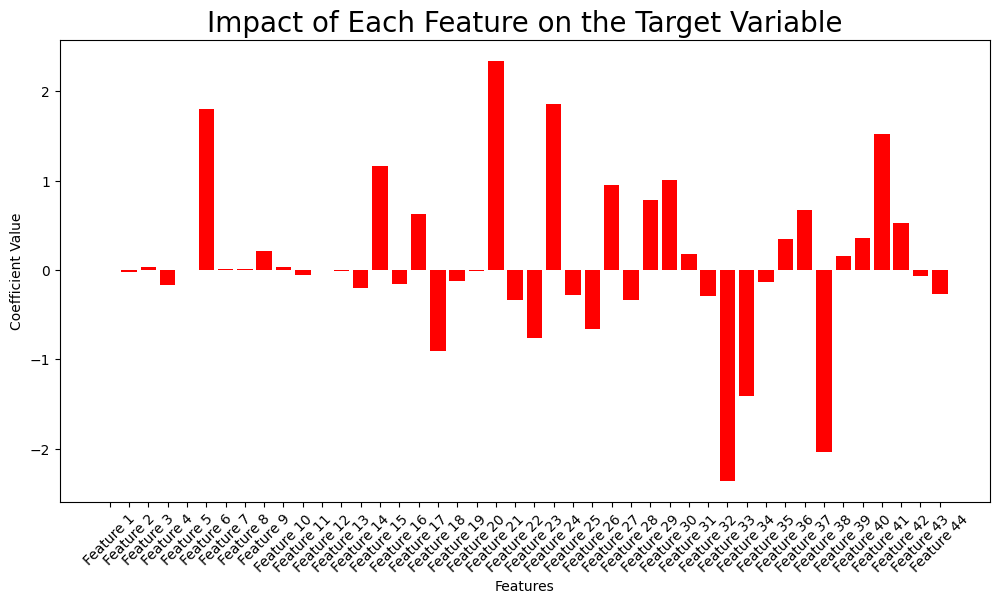

In [ ]:
features = [f'Feature {i + 1}' for i in range(n)]
plt.figure(figsize=(12, 6))

plt.bar(range(n), a_final[0:n], color = 'r')

plt.title("Impact of Each Feature on the Target Variable", fontdict={'fontsize': 20})
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.xticks(range(n), features, rotation=45)

plt.show()

## **13. Prediction For Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/binary_classification_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)

(12000, 20)


In [ ]:
df_test['Feature_21'] = df_test['Feature_6'] ** 2                        #squares
df_test['Feature_22'] = df_test['Feature_9'] ** 2
df_test['Feature_23'] = df_test['Feature_14'] ** 2
df_test['Feature_24'] = df_test['Feature_15'] ** 2
df_test['Feature_25'] = df_test['Feature_17'] ** 2


df_test['Feature_26'] = df_test['Feature_6'] * df_test['Feature_15']     #interacting features
df_test['Feature_27'] = df_test['Feature_6'] * df_test['Feature_17']
df_test['Feature_28'] = df_test['Feature_6'] * df_test['Feature_4']
df_test['Feature_29'] = df_test['Feature_6'] * df_test['Feature_16']
df_test['Feature_30'] = df_test['Feature_15'] * df_test['Feature_17']
df_test['Feature_31'] = df_test['Feature_4'] * df_test['Feature_16']

df_test['Feature_32'] = df_test['Feature_4'] ** 3
df_test['Feature_33'] = df_test['Feature_6'] ** 3
df_test['Feature_34'] = df_test['Feature_15'] ** 3
df_test['Feature_35'] = df_test['Feature_16'] ** 3
df_test['Feature_36'] = df_test['Feature_17'] ** 3
df_test['Feature_37'] = df_test['Feature_18'] ** 3

df_test['Feature_38'] = df_test['Feature_6'] ** 4                         #fourthpower
df_test['Feature_39'] = df_test['Feature_15'] ** 4
df_test['Feature_40'] = df_test['Feature_17'] ** 4

df_test['Feature_41'] = df_test['Feature_6'] ** 5                         #fifthpower
df_test['Feature_42'] = df_test['Feature_15'] ** 5
df_test['Feature_43'] = df_test['Feature_17'] ** 5
df_test['Feature_44'] = df_test['Feature_18'] ** 5

print(df_test)

       Feature_1   Feature_2   Feature_3  Feature_4   Feature_5   Feature_6  \
0     -21.263636 -101.510764   70.115563 -67.257828   60.603386  -14.047965   
1     -28.646489 -104.090028  124.098974 -45.906780   85.691869   91.241763   
2     -34.084427 -149.471464  131.883193  96.372918   41.865528  -14.692982   
3     -38.905587 -126.038930   86.480118 -76.173919   98.722116   15.411935   
4     -41.041415 -124.302646   89.549410 -98.980090   72.425692   15.907022   
...          ...         ...         ...        ...         ...         ...   
11995 -24.270292  -40.953059  126.403165 -85.023186   73.873895   19.786924   
11996 -30.474886 -201.124891   79.824920 -96.541722   77.483155  186.285533   
11997 -24.547995 -152.072592  132.767918 -27.689569  141.583374   68.408449   
11998 -29.200068 -100.303304  115.709923 -91.765981  108.346710  213.651331   
11999 -25.239428 -188.996751   87.775963 -58.966752   89.806261    0.649320   

       Feature_7  Feature_8   Feature_9  Feature_10

`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_44']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[-2.12636358e+01 -1.01510764e+02  7.01155635e+01 ...  1.61289773e+11
  -1.34216582e+09  4.80520063e+10]
 [-2.86464894e+01 -1.04090028e+02  1.24098974e+02 ...  3.96504510e+12
  -3.81740032e+08  8.95817428e+10]
 [-3.40844268e+01 -1.49471464e+02  1.31883193e+02 ... -6.04892919e+07
   5.38717396e+03  3.35740136e+11]
 ...
 [-2.45479947e+01 -1.52072592e+02  1.32767918e+02 ... -6.63721187e+06
   2.81723884e+04  7.12633049e+10]
 [-2.92000676e+01 -1.00303304e+02  1.15709923e+02 ...  6.70058333e+11
  -9.07607952e-02  1.93289024e+11]
 [-2.52394276e+01 -1.88996751e+02  8.77759626e+01 ...  1.76258527e+12
  -6.55498464e+09  1.67072034e+11]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'x_test = {x_test}')

x_test = [[ 2.44117334 -0.32121815 -0.55395478 ... -0.21897384  0.18955379
  -0.24932704]
 [ 0.86576778 -0.37793851  0.83275788 ...  0.27830987  0.32603172
  -0.03413895]
 [-0.29461777 -1.3759177   1.03271699 ... -0.24006795  0.38027832
   1.24134122]
 ...
 [ 1.7403336  -1.4331189   1.0554436  ... -0.24006091  0.38028155
  -0.12905671]
 [ 0.74764134 -0.294665    0.61726198 ... -0.15246001  0.38027755
   0.50322473]
 [ 1.59279074 -2.24511484 -0.10029876 ... -0.00962857 -0.55119554
   0.36738029]]


`Prediction for Test Set`

In [ ]:
prediction_test_set = np.array([])

for i in range(x_test.shape[0]):
  a = np.dot(x_test, a_final) + b_final
  probability = sigmoid(a)

  if probability[i] >= 0.96:
    prediction_test_set = np.append(prediction_test_set, 1)
  else:
    prediction_test_set = np.append(prediction_test_set, 0)

print(prediction_test_set)

[0. 0. 0. ... 0. 1. 0.]


`Saved the prediction in Google Drive`

In [ ]:
#df = pd.DataFrame(prediction_test_set)
#df.columns = ['Prediction_binaryclassification']
#df.to_csv('/content/drive/MyDrive/binary_classification_test_prediction.csv', index=False)

## **14. Prediction**

In [ ]:
x_input = np.array([])

for i in range(20):
  features = input(f'feature_{i+1} = ')
  x_input = np.append(x_input, np.array(float(features)))


Prediction = Logistic_Regression(x_input, a_final, b_final)
if Prediction >= 0.961:
  Prediction = 1
else:
  Prediction = 0

print()

print(f"Prediction for Input x = {Prediction}")